Netflix Shows and Movies - Exploratory Analysis

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


Load Netflix dataset

In [3]:
path = "C:/AI-ML/AI_MI_Career/datasets/netflix_titles_nov_2019.csv"
netflix = pd.read_csv(path)
print("Dataset loaded successfully!")


Dataset loaded successfully!


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


1. Basic Data Understanding
- How many total records are there?
- What are the data types of each column?
- Are there any missing/null values?
- Count of unique values per column.

In [5]:
#How many total records are there?
total_records = netflix.shape[0]
print(f"Total records: {total_records}")
#What are the data types of each column?
data_types = netflix.dtypes
print("Data types of each column:")
print(data_types)

Total records: 5837
Data types of each column:
show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object


In [6]:
#Are there any missing/null values?
missing_values = netflix.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64


In [7]:
#Count of unique values per column.
unique_counts = netflix.nunique()
print("Count of unique values per column:")
print(unique_counts)

Count of unique values per column:
show_id         5837
title           5780
director        3108
cast            5087
country          527
date_added      1092
release_year      71
rating            14
duration         194
listed_in        449
description     5829
type               2
dtype: int64


TASK 2: 
- How many unique titles, directors, and countries are there?
- Identify any columns with missing values and their percentages.
- Count how many entries fall under each type: Movie or TV Show.

In [8]:
#How many unique titles, directors, and countries are there?
unique_counts = netflix[['title', 'director', 'country']].nunique()
print("Unique counts for titles, directors, and countries:")
print(unique_counts)


Unique counts for titles, directors, and countries:
title       5780
director    3108
country      527
dtype: int64


In [9]:
#Identify any columns with missing values and their percentages.
missing_percentage = netflix.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
show_id          0.000000
title            0.000000
director        32.568100
cast             9.525441
country          7.315402
date_added      10.998801
release_year     0.000000
rating           0.171321
duration         0.000000
listed_in        0.000000
description      0.000000
type             0.000000
dtype: float64


type
Movie      3939
TV Show    1898
Name: count, dtype: int64


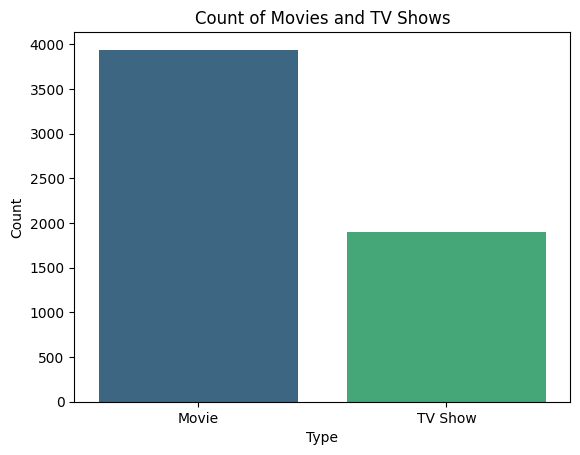

In [10]:
#Show the distribution of content by type (Movie vs TV Show).
print(netflix['type'].value_counts())
sns.countplot(data=netflix, x='type', order=netflix['type'].value_counts().index, 
    palette='viridis',legend=False)
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


TASK 3 : Content Distribution
- Find the top 5 most common genres (listed_in) across all content.
- What are the top 10 countries with the most content on Netflix?

Top 5 most common genres:
listed_in
International Movies      1797
Dramas                    1488
Comedies                   992
International TV Shows     966
Documentaries              658
TV Dramas                  574
Action & Adventure         532
Independent Movies         516
TV Comedies                425
Crime TV Shows             355
Name: count, dtype: int64


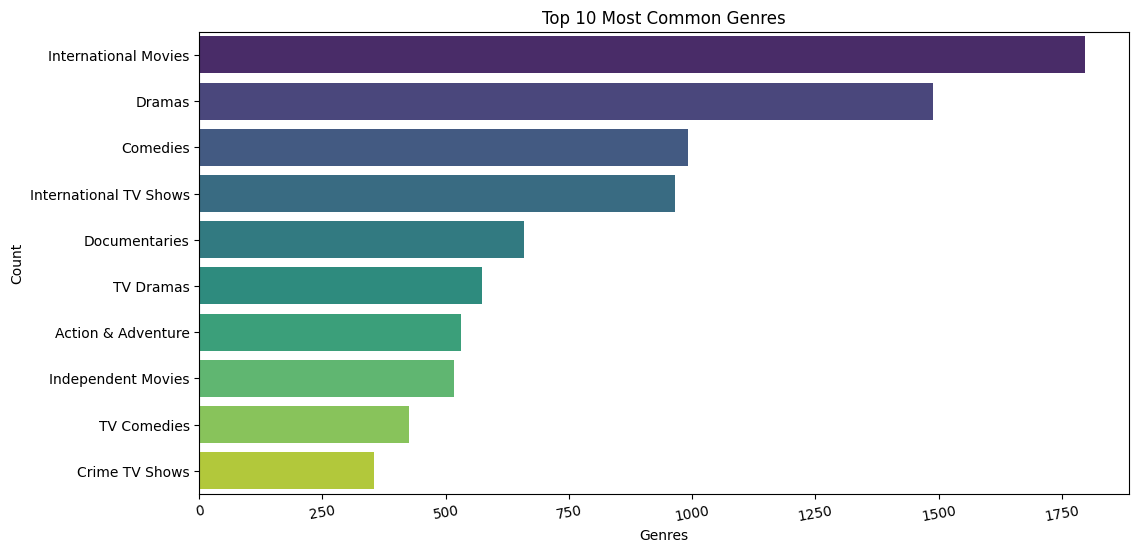

In [11]:
#Find the top 5 most common genres (listed_in) across all content.
top_genres = netflix['listed_in'].str.split(', ').explode().value_counts().head(10)
print("Top 5 most common genres:") 
print(top_genres)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.xticks(rotation=10)
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()


In [13]:
#What are the top 10 countries with the most content on Netflix?
countries_genres = netflix.groupby('country')['listed_in'].apply(lambda x: ', '.join(x)).reset_index()
countries_genres['listed_in'] = countries_genres['listed_in'].str.split(', ')
countries_genres = countries_genres.explode('listed_in')
top_countries_genres = countries_genres['country'].value_counts().head(10)
print("Top 10 countries with the most content on Netflix:")
print(top_countries_genres)

Top 10 countries with the most content on Netflix:
country
United States     3358
India             1884
United Kingdom     774
Japan              406
South Korea        380
Spain              297
Canada             269
Turkey             206
France             203
Taiwan             197
Name: count, dtype: int64


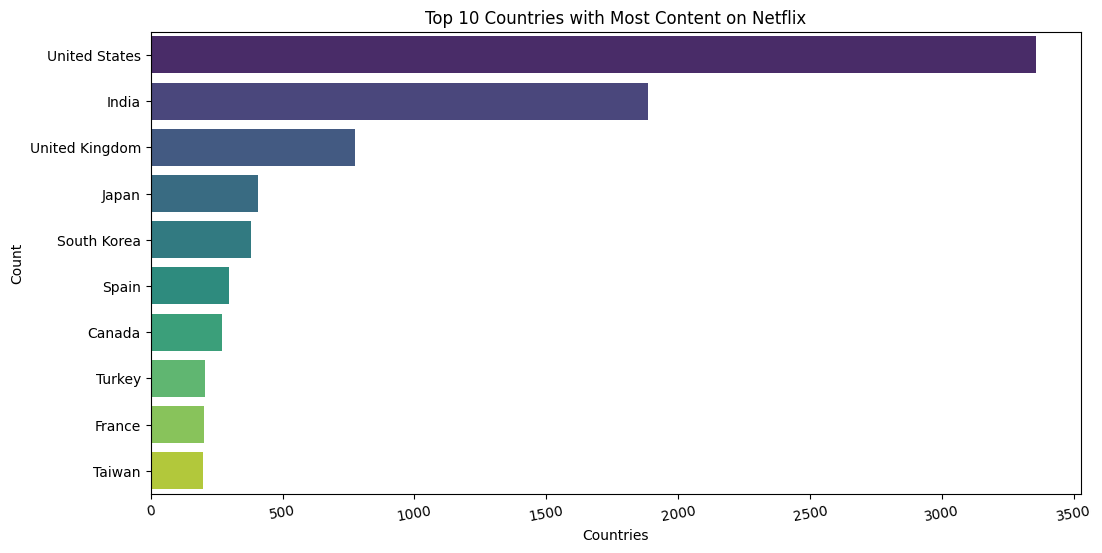

In [ ]:
#What are the top 10 countries with the most content on Netflix?
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries_genres.values, y=top_countries_genres.index, palette='viridis')
plt.xticks(rotation=10)
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

3. People-Centric Analysis
- Who are the top 10 directors with the most Netflix shows/movies?
- Which actors appear most frequently in the cast column?
- Which movies/shows have no listed director?

Top 10 directors with the most Netflix shows/movies:
director
Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           8
Martin Scorsese            8
Johnnie To                 8
Lance Bangs                7
Cathy Garcia-Molina        7
Shannon Hartman            7
Name: count, dtype: int64


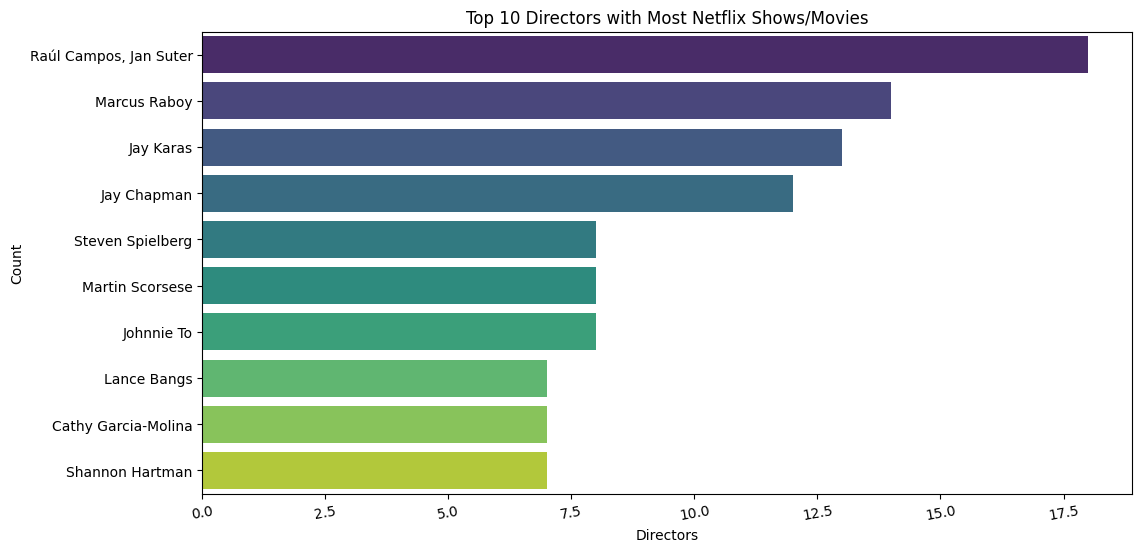

In [19]:
top_directors = netflix['director'].value_counts().head(10)
print("Top 10 directors with the most Netflix shows/movies:")
print(top_directors)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.xticks(rotation=10)
plt.title('Top 10 Directors with Most Netflix Shows/Movies')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.show()

Top 10 actors appearing most frequently in the cast column:
cast
Anupam Kher           29
Shah Rukh Khan        28
Akshay Kumar          23
Andrea Libman         22
Yuki Kaji             22
Ashleigh Ball         22
Takahiro Sakurai      22
Om Puri               21
John Cleese           20
Paresh Rawal          19
Boman Irani           18
Vincent Tong          18
David Attenborough    18
Erin Fitzgerald       18
Kareena Kapoor        17
Naseeruddin Shah      17
Laura Bailey          17
Gulshan Grover        16
Nicolas Cage          16
Daisuke Ono           16
Name: count, dtype: int64


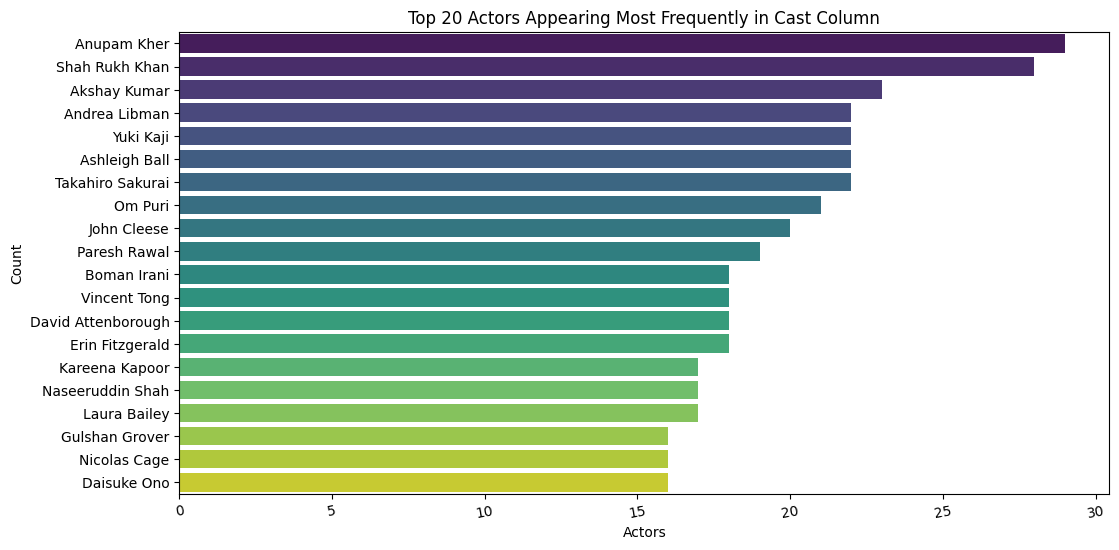

In [ ]:
top_actors = netflix['cast'].str.split(', ').explode().value_counts().head(20)
print("Top 10 actors appearing most frequently in the cast column:") 
print(top_actors)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='viridis')
plt.xticks(rotation=10)
plt.title('Top 20 Actors Appearing Most Frequently in Cast Column')
plt.xlabel('Actors')
plt.ylabel('Count')
plt.show()


Movies/Shows with no listed director:
                      title     type
0                 Chocolate  TV Show
4           Chip and Potato  TV Show
8          La Reina del Sur  TV Show
11     Sugar Rush Christmas  TV Show
13     The Charming Stepmom  TV Show
15  The Movies That Made Us  TV Show
17                   Levius  TV Show
18          Lugar de Mulher  TV Show
19     Merry Happy Whatever  TV Show
20              Mythomaniac  TV Show


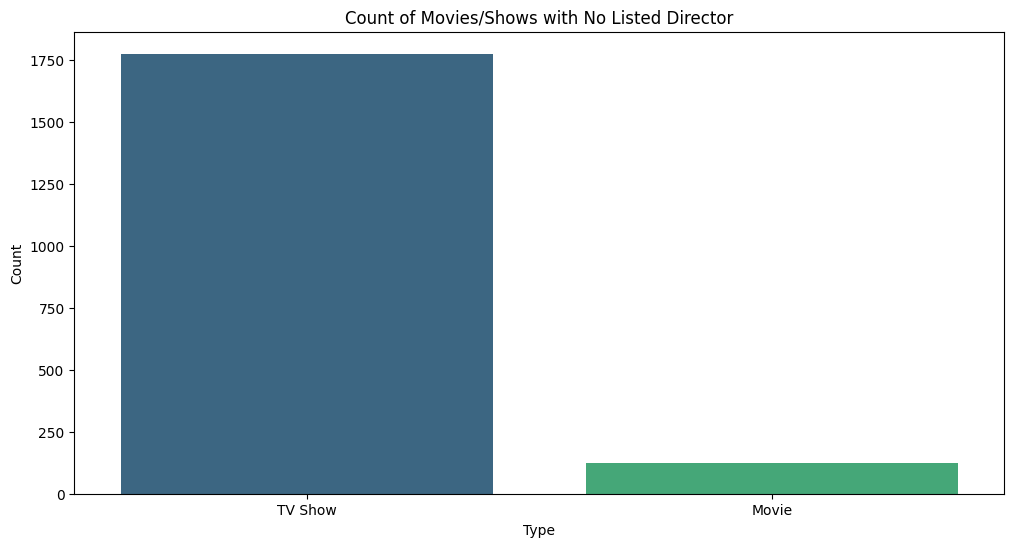

In [24]:
no_director = netflix[netflix['director'].isnull()]
print("Movies/Shows with no listed director:") 
print(no_director[['title', 'type']].head(10))
plt.figure(figsize=(12, 6))
sns.countplot(data=no_director, x='type', order=no_director['type'].value_counts().index, 
    palette='viridis',legend=False)
plt.title('Count of Movies/Shows with No Listed Director')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()



4, Time-Based Trends
- Show the number of releases per release_year.
- What year had the most content released?
- Based on date_added, what is the monthly trend of Netflix additions?
- How many shows were added in each month of the year, across years?

Number of releases per release_year:
year
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       7
2013.0       9
2014.0      19
2015.0      74
2016.0     412
2017.0    1184
2018.0    1629
2019.0    1843
Name: count, dtype: int64


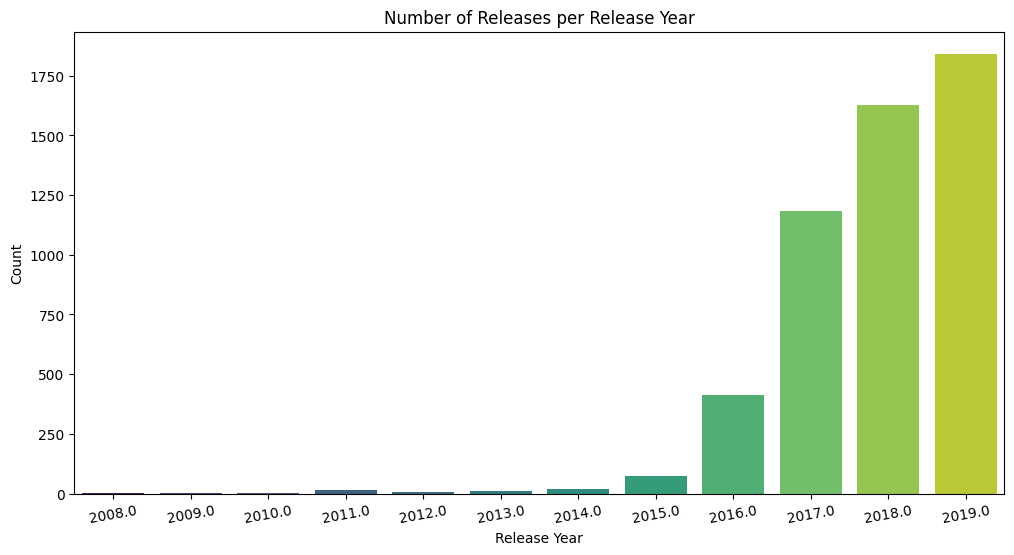

In [33]:
netflix['release_year'] = pd.to_datetime(netflix['date_added'])
netflix['year'] = netflix['release_year'].dt.year
releases_per_year = netflix['year'].value_counts().sort_index()
print("Number of releases per release_year:")
print(releases_per_year)
plt.figure(figsize=(12, 6))
sns.barplot(x=releases_per_year.index, y=releases_per_year.values, palette='viridis')
plt.xticks(rotation=10)
plt.title('Number of Releases per Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [34]:
top_content_year = releases_per_year.idxmax()
print(f"The year with the most content released is: {top_content_year}")


The year with the most content released is: 2019.0


Monthly trend of Netflix additions:
date_added
2019-11    258
2019-10    193
2019-09    136
2019-08    134
2019-07    161
2019-06    157
2019-05    161
2019-04    162
2019-03    177
2019-02    153
2019-01    151
2018-12    183
2018-11    154
2018-10    181
2018-09    122
2018-08    171
2018-07    147
2018-06     73
2018-05     95
2018-04    125
Freq: M, Name: count, dtype: int64


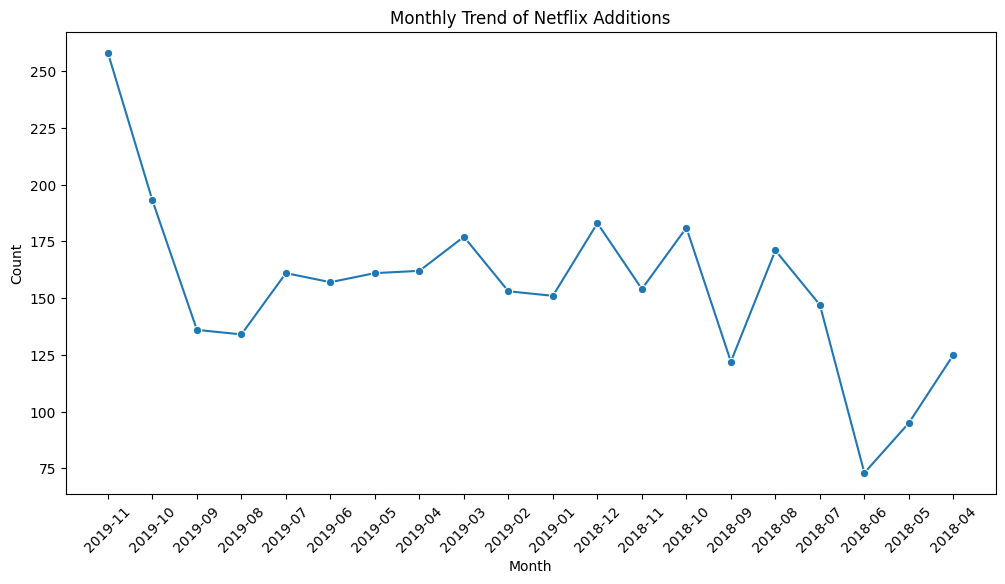

In [43]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')
monthly_trend = netflix['date_added'].dt.to_period('M').value_counts().sort_index(ascending=False).head(20)
print("Monthly trend of Netflix additions:")
print(monthly_trend)
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_trend.index.astype(str), y=monthly_trend.values, marker='o', palette='viridis')
plt.xticks(rotation=45)
plt.title('Monthly Trend of Netflix Additions')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


Number of shows added in each month of the year, across years:
date_added
1.0     389
2.0     342
3.0     504
4.0     406
5.0     380
6.0     339
7.0     413
8.0     454
9.0     420
10.0    580
11.0    544
12.0    424
Name: count, dtype: int64


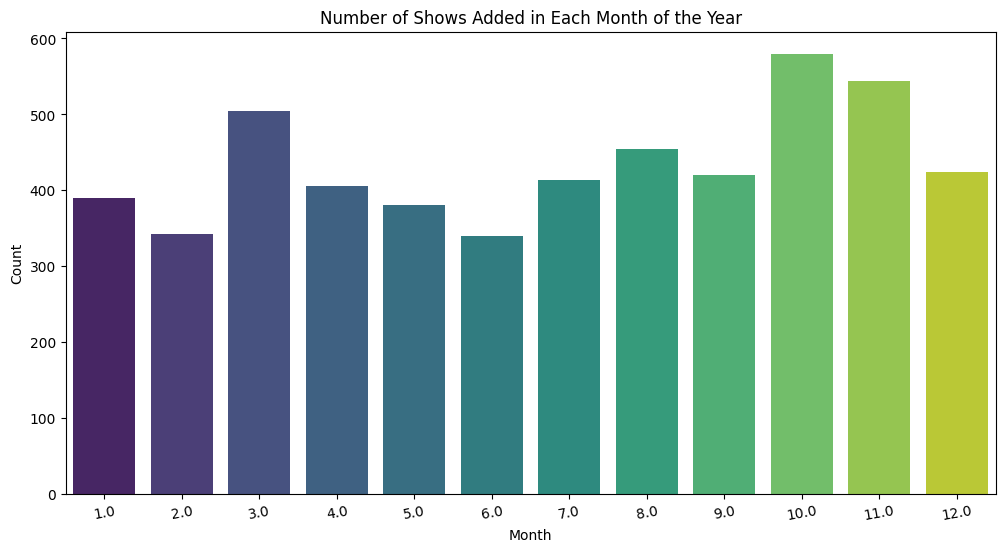

In [48]:
#How many shows were added in each month of the year, across years?
monthly_additions = netflix['date_added'].dt.month.value_counts().sort_index()
print("Number of shows added in each month of the year, across years:")
print(monthly_additions)
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_additions.index, y=monthly_additions.values, palette='viridis')
plt.xticks(rotation=10)
plt.title('Number of Shows Added in Each Month of the Year')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


Duration Insights
- For movies, find the most common durations in minutes.

In [ ]:
#For movies, find the most common durations in minutes.
most_common_duration = netflix[netflix['type'] == 'Movie']['duration'].value_counts().idxmax()
print(f"The most common duration for movies is: {most_common_duration} minutes")

The most common duration for movies is: 90 min minutes


In [ ]:
#For TV Shows, what is the distribution of number of seasons?
tv_show_seasons = netflix[netflix['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(int)
seasons_distribution = tv_show_seasons.value_counts().sort_index()
seasons_distribution.head(20)


0 
1     1259
2      298
3      157
4       60
5       46
6       21
7       21
8       16
9        7
10       3
11       3
12       2
13       2
14       1
15       2
Name: count, dtype: int64